# Valores faltantes y deducción de tendencia

### Notebook por **David Andrés** 🤖📈🐍 

#### para [💊Machine Learning Pills💊](https://mlpills.dev/)

**Sígueme en Twitter**: [@daansan_ml](https://twitter.com/daansan_ml)




---------------

Vamos a instalar las librerias que vamos a necesitar.

In [1]:
import numpy as np
import pandas as pd 

import datetime

import matplotlib.pyplot as plt

## Importa el dataset

Primero tenemos que importar el dataset.

En este notebook vamos a trabajar con datos sobre la producción de cerveza mensual en Australia.

In [2]:
df = pd.read_csv("dataset/monthly-beer-production-in-austr.csv")

### Análisis de Datos Exploratorio

Vamos a ver cómo es el dataset.

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


En Series Temporales necesitamos que el índice del dataset sea la fecha.

Primero, vamos a comprobar que la fecha tiene el formato correcto (Fechatime).

In [4]:
df.dtypes

Month                       object
Monthly beer production    float64
dtype: object

La columna `Mes` no es del tipo Fechatime. Vamos a convertirla.

In [5]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

Voy a traducir al espanol los nombres de las columnas

In [6]:
df.columns = ['Mes', 'Produccion mensual de cerveza']

Ahora podemos verificar que los cambios son correctos.

In [7]:
df.dtypes

Mes                              datetime64[ns]
Produccion mensual de cerveza           float64
dtype: object

Vamos a poner la fecha (`Mes`) en el índice.

In [8]:
df = df.set_index('Mes')

Y finalmente volver a verificar que ha funcionado. 

In [9]:
df.head()

,Produccion mensual de cerveza
Mes,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


Lo tenemos como queríamos, el índice del dataframe es la fecha.

Vamos a convertir también el dataframe a series seleccionando solo la única columna presente. Podemos hacer esto aquí porque estamos en un caso univariable.

In [10]:
df_cerveza = df['Produccion mensual de cerveza']

Es muy importante visualizar los datos. 

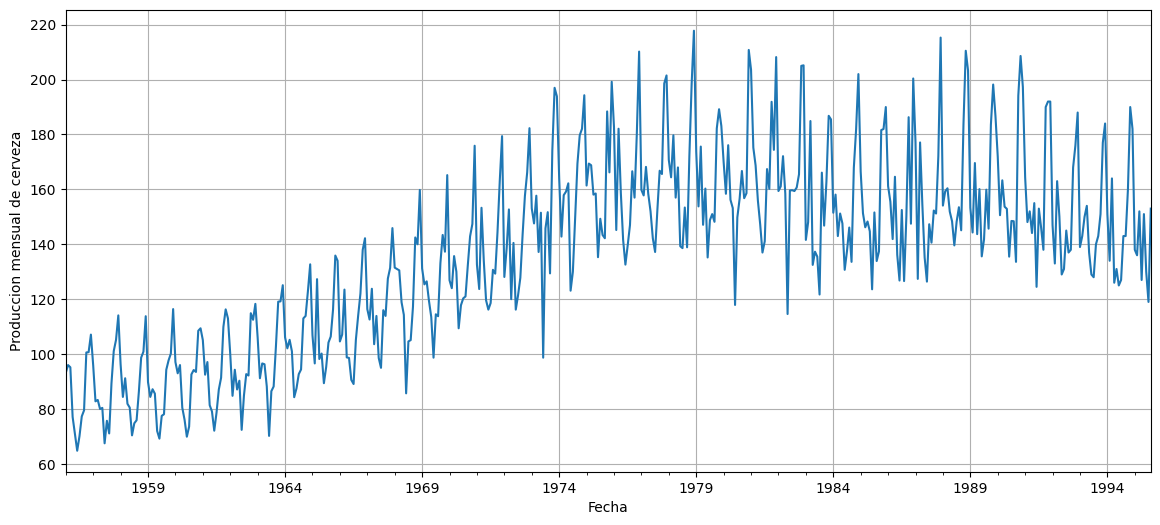

In [11]:
# Importar librerias requeridas
import matplotlib.pyplot as plt

# Visualizar datos
df_cerveza.plot(figsize=(14,6))
plt.xlabel('Fecha')
plt.ylabel('Produccion mensual de cerveza')
plt.grid()
plt.show()

Algunas observaciones:
* No es estacionario
* Parece haber un componente estacional
* Hay tendencia y varianza incremental
* Parece haber valores atípicos

### Valores faltantes

Tenemos que comprobar que no haya valores faltantes en el dataframe.

In [12]:
df_cerveza.isna().sum()

0

Afortunadamente no hay. 

Si los hubiera podrías tratarlos de las siguientes formas.

### Deducción de tendencia

El primer paso es quitar la tendencia. Hay muchas formas de conseguirlo, nosotros usaremos *diferenciación*.

In [13]:
df_cerveza = df_cerveza.diff()

Tenemos que quitar el primer valor *NaN* que viene de diferenciar.

In [14]:
df_cerveza = df_cerveza.dropna()

Ahora podemos ver su aspecto. 

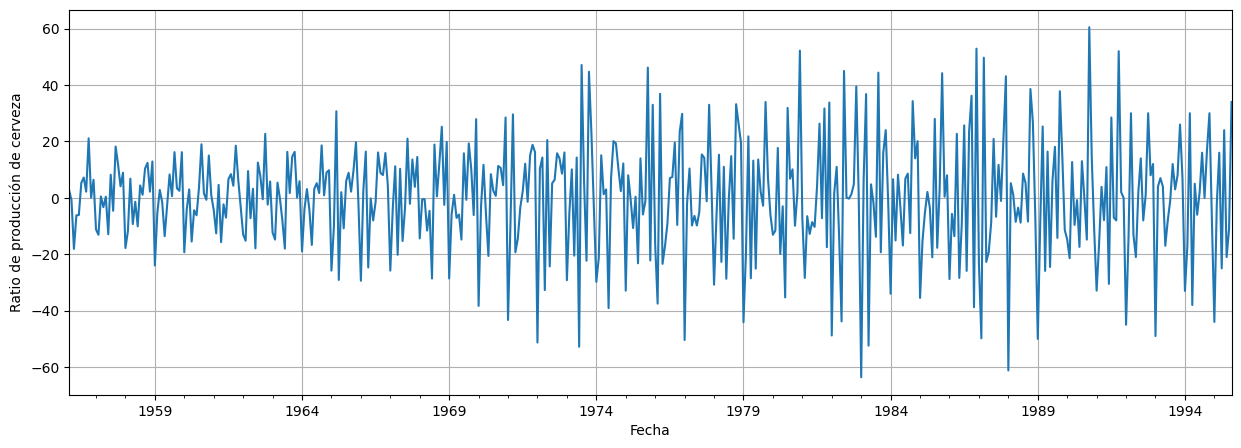

In [15]:
df_cerveza.plot(figsize=(15,5))
plt.xlabel('Fecha')
plt.ylabel('Ratio de producción de cerveza')
plt.grid()
plt.show()

Puedes ver que está centrado alrededor de cero.

Sin embargo, todavía tenemos volatilidad incremental que tenemos que tratar para conseguir que sea estacionario.

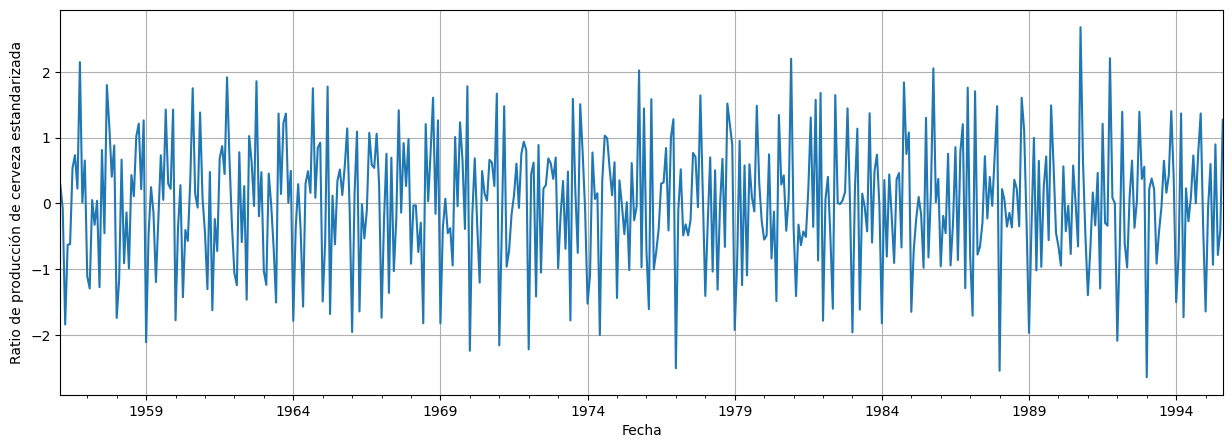

In [16]:
# Calcula la variancia anual (equivalente a desviación típica)
annual_variance = df_cerveza.groupby(df_cerveza.index.year).std()
mapped_annual_variance = df_cerveza.index.map(
    lambda x: annual_variance.loc[x.year])

# Estandarizar la varianza anual
df_cerveza = df_cerveza / mapped_annual_variance

# Mostrar resultado
df_cerveza.plot(figsize=(15,5))
plt.xlabel('Fecha')
plt.ylabel('Ratio de producción de cerveza estandarizada')
plt.grid()
plt.show()

Finalmente podemos ver como nuestros datos tienen varianza y media constante. Estamos más cerca de conseguir que sea estacionario.

En el próximo artículo iremos más allá y quitaremos estacionalidad. Nos vemos!

------

#### [💊Machine Learning Pills💊](https://mlpills.dev/)

**Sígueme en Twitter**: [@daansan_ml](https://twitter.com/daansan_ml)

### **David Andrés** 🤖📈🐍 